In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm

def plot_spherical_harmonics(m, l):
    
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(projection='3d')
    limit = 0.5
    resolution = 1000
    # Create the mesh in polar coordinates and compute corresponding Z.
    phi = np.linspace(0, np.pi, resolution)
    theta = np.linspace(0, 2*np.pi, resolution)
    phi, theta = np.meshgrid(phi, theta)
    xyz = np.array([np.sin(theta) * np.sin(phi),
                    np.sin(theta) * np.cos(phi),
                    np.cos(theta)])

    Y = sph_harm(abs(m), l, phi, theta)

    # Linear combination of Y_l,m and Y_l,-m to create the real form.
    if m < 0:
        Y = np.sqrt(2) * (-1)**m * Y.imag
    elif m > 0:
        Y = np.sqrt(2) * (-1)**m * Y.real
    Yx, Yy, Yz = np.abs(Y) * xyz

    cmap = plt.cm.ScalarMappable(cmap=plt.cm.YlGnBu_r)
    cmap.set_clim(-limit, limit)

    ax.plot_surface(Yx, Yy, Yz,
                    facecolors=cmap.to_rgba(Y.real),
                    rstride=2, cstride=2)

    # Set the Axes limits and title.
    ax.set_title(r'$Y_{{{}}}^{{{}}}$'.format(l, m))
    ax.set_xlim(-limit, limit)
    ax.set_ylim(-limit, limit)
    ax.set_zlim(-limit, limit)

    plt.show()

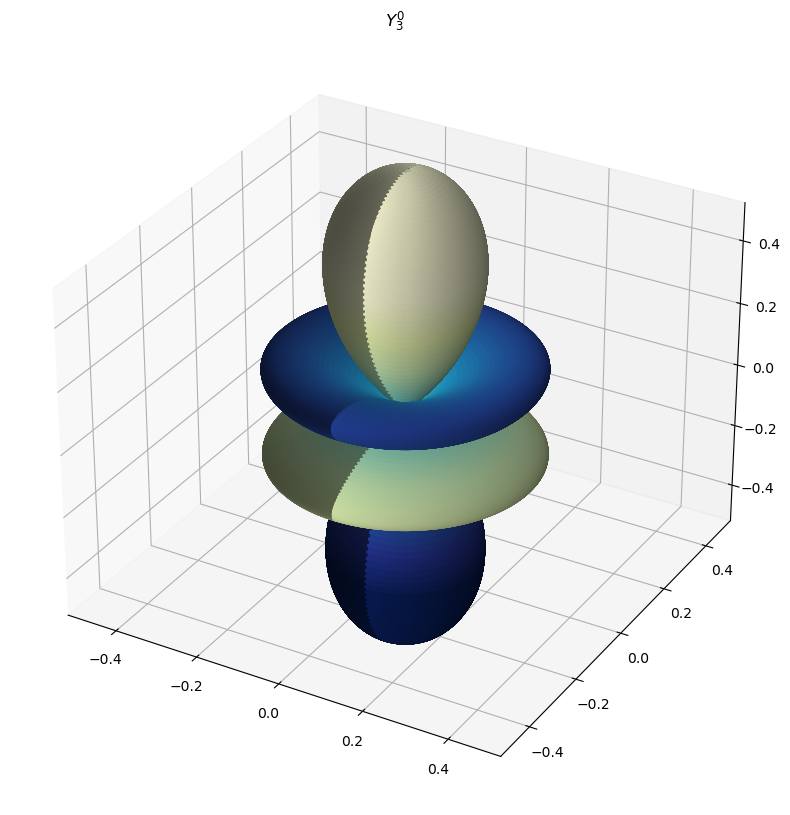

In [56]:
plot_spherical_harmonics(0, 3)

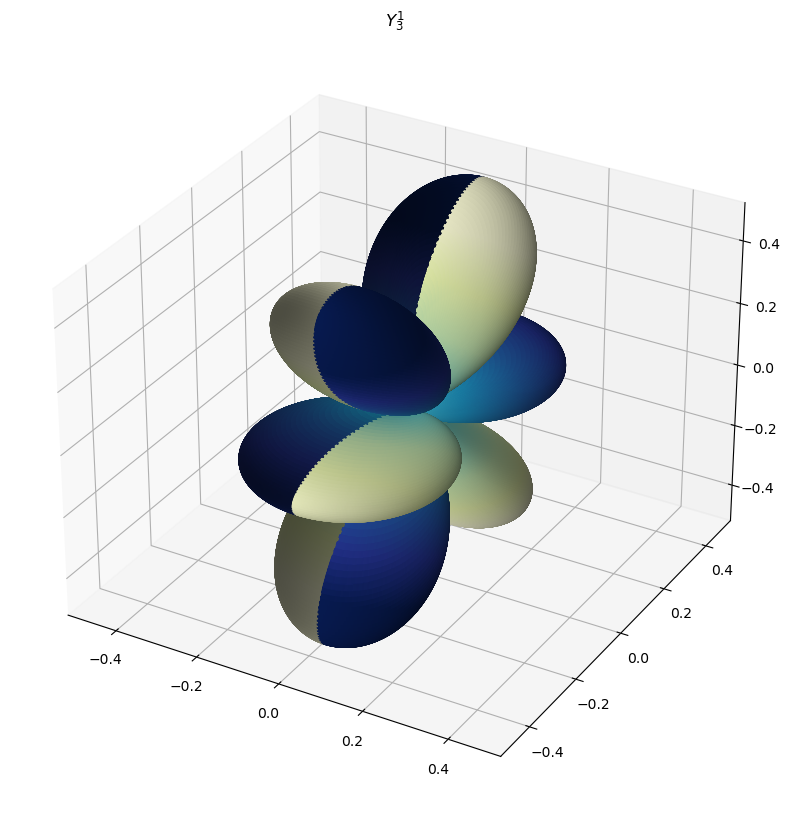

In [55]:
plot_spherical_harmonics(1, 3)

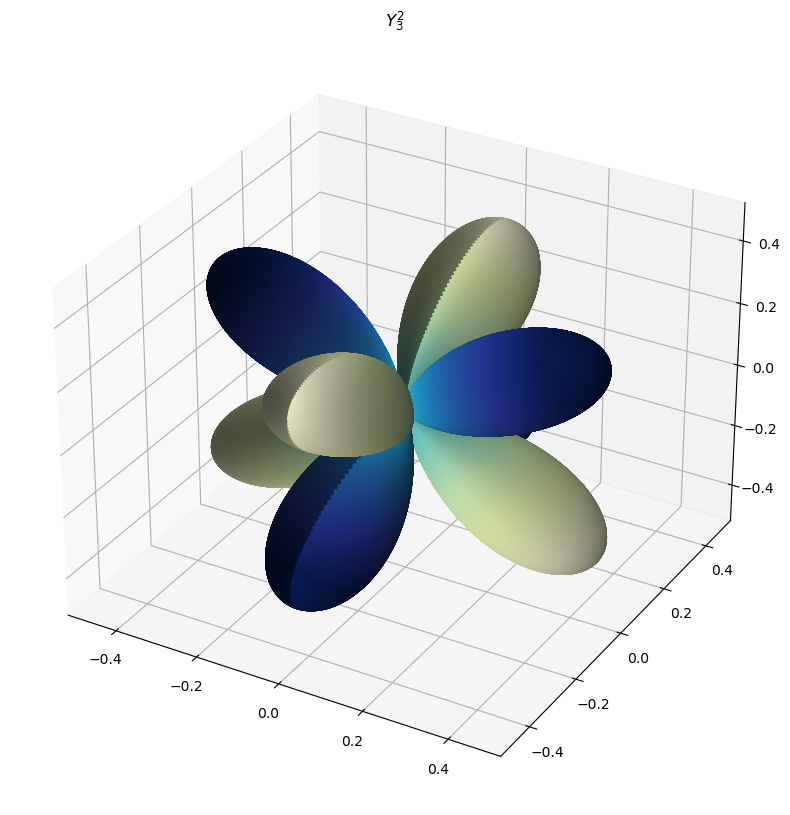

In [57]:
plot_spherical_harmonics(2, 3)

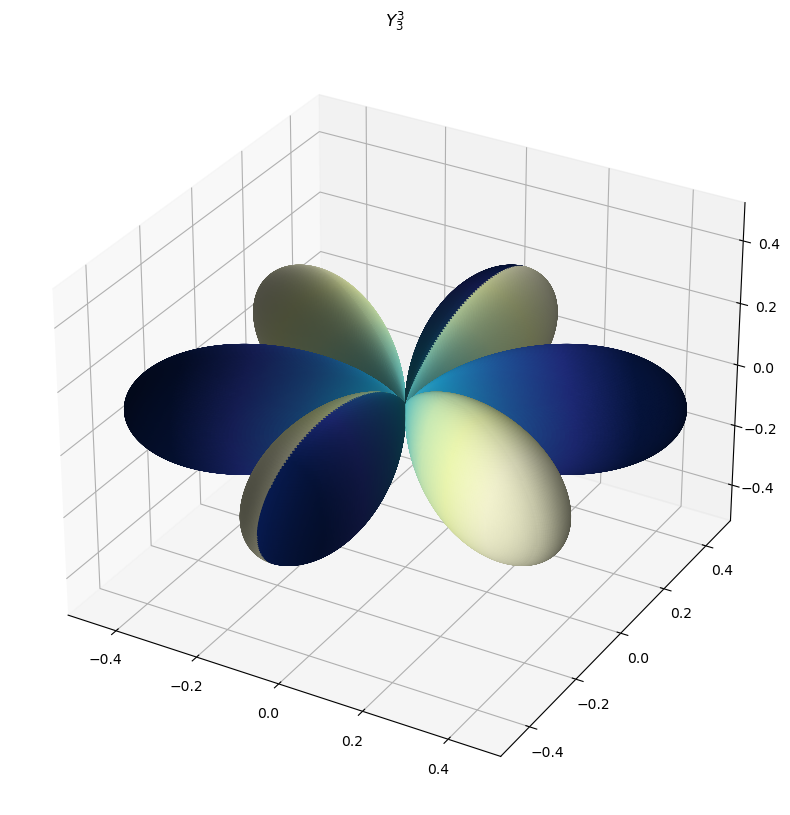

In [58]:
plot_spherical_harmonics(3, 3)